# Homework Assignment -3

## Group Members

- Jacob Pammer _(jwp2843)_
- Rohitashwa Chakraborty _(rc47878)_
- Vishal Gupta _(vg22846)_


In [1]:
import pandas as pd
from pandas import Series, DataFrame

%pylab inline 

Populating the interactive namespace from numpy and matplotlib


# [Q1 10 points] Read in data

## Problem Statement:
Read in the files gold.txt and labels.txt.  The gold DataFrame should have columns url and category, while thelabelsDataFrame should havecolumnsturk,urlandcategory.  You will have to pick the right separator.

## Solution:
Reading gold.txt and labels.txt into DataFrames ```gold``` and ```labels``` respectively

## Code:

In [2]:
gold = pd.read_csv("gold.txt", sep = "\t", header=None)
gold.columns = ["url","category"]
print("Length of gold",len(gold))
gold.drop_duplicates(subset="url",inplace=True)
print("Length of gold after dropping duplicate urls",len(gold))

gold.head()

Length of gold 1517
Length of gold after dropping duplicate urls 1517


,url,category
0,http://0800-horoscope.com,G
1,http://18games.net,X
2,http://1pixelout.net,G
3,http://1porno.com/004/teens/index.html,X
4,http://1stpussy.com/005/16/index.html,X


In [3]:
labels = pd.read_csv("labels.txt", sep = "\t", header=None)
labels.columns = ["turk","url","category"]
print("Length of labels",len(labels))
labels.drop_duplicates(subset=["turk","url","category"], inplace=True)
print("Length of labels after dropping Duplicate rows",len(labels))
s))
labels.he

Length of labels 92721
Length of labels after dropping Duplicate rows 89948


,turk,url,category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G
5,A2OVKTB7VNY8EW,http://000.cc,G


**NOTE:**
Dropping Duplicate rows because a turk assigning the same category to an url repeatedly technically still counts as one.

However, if a Turk assigns different category to the same url, both should be  accounted for

***

# [Q2 10 points] Split into two DataFrames
## Problem Statement

Split the ```labels``` DataFrame into two:

- **labels_on_gold:** contains all rows where the url is present in the gold set
- **labels_unknown:** contains all remaining rows of ```labels```.

## Solution

For url is quicker processing, instead of iterating over the ```gold``` DataFrame everytime to check if an url is present in it or not, I've created a set of urls preset in ```gold``` DataFrame.

Thereafter, I'm applying a *lambda* function over *labels* DataFrame to filter vis-a-vis split *labels* into *labels_on_gold* and  *labels_unknown* DataFrames

## Code


In [4]:
gold_dict = set(gold["url"])
labels_on_gold = labels[labels.apply(lambda row: row["url"] in gold_dict, axis = 1)]
print("Length of Labels on Gold",len(labels_on_gold))
labels_on_gold.head()

Length of Labels on Gold 3319


,turk,url,category
245,A1253FXHCZ9CWM,http://0800-horoscope.com,G
246,A153PKAL7OAY36,http://0800-horoscope.com,G
247,A1FV9SAPL5C6KY,http://0800-horoscope.com,G
248,A1JTOT0DWM6QGL,http://0800-horoscope.com,G
249,A1PXXEOGQ76RNJ,http://0800-horoscope.com,G


In [5]:
labels_unknown = labels[labels.apply(lambda row: row["url"] not in gold_dict, axis = 1)]
print("Length of Labels Unknown",len(labels_unknown))
labels_unknown.head()

Length of Labels Unknown 86629


,turk,url,category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G
5,A2OVKTB7VNY8EW,http://000.cc,G


# [Q3 10 points] Compute accuracies of turks

## Problem Statement

Create a ```ratergoodness``` DataFrame that has the following specifications:

- Indexed by *turk*
- Has two columns:
    - The ```number of ratings```
    - The ```average correctness of ratings``` 

foreach turk (both on gold set urls).

## Solution

First we *merge* ```labels_on_gold``` and ```gold``` on ```url``` to get their inner join. This essentially returns a DataFrame of all turks who rated the gold-urls, along with their ratings *(category_labels)* and the actual rating *(category_gold)*

Second, we create an empty DataFrame ```rater_goodness``` that we populate as follows:

- *Groupby* the aforementioned DataFrame on *turk*
- **Number of Ratings:** Number of rows in each group
- **Average Correctness of Ratings:** Mean of number of Correct Predictions

## Code


In [6]:
# creating merged dataframe with category marked by turk and known category
labels_merged = labels_on_gold.merge(gold, on='url', suffixes=('_turk', '_actual'))
labels_merged['correct_label'] = (labels_merged['category_turk'] == labels_merged['category_actual']).astype(int)


In [7]:
# creating groupby df to get total labels checked by each turk and average correctness
rater_goodness = labels_merged.groupby('turk')['correct_label'].agg(['count', 'mean'])
rater_goodness.columns = ["Number of Ratings",
                        "Average Correctness of Ratings"]
rater_goodness

,Number of Ratings,Average Correctness of Ratings
turk,,
A112DVP1KG4QZU,1,1.000000
A1253FXHCZ9CWM,29,0.517241
A12CY1Q7XKJJDE,1,1.000000
A12RE8G66WTO8B,20,0.750000
A12Y1GTGIQDGRA,3,0.333333
...,...,...
AYWOBMTEGFVVI,1,0.000000
AZ1S5BIG5R6P6,35,0.714286
AZSDW7JJL5VA7,100,0.680000


In [8]:
# df = pd.merge(left = labels_on_gold, right = gold, on = "url", suffixes = ("_labels","_gold"))
# df

In [9]:
# rater_goodness = DataFrame([], index = set(df["turk"]),
#                             columns = ["Number of Ratings",
#                             "Average Correctness of Ratings"])
# print("Dimensions of rater_goodness: ",rater_goodness.shape)

In [10]:
# df_grouped = df.groupby("turk")
# for item in df_grouped.groups:
#     temp = df_grouped.get_group(item)
#     rater_goodness["Number of Ratings"][item] = temp.shape[0]
#     rater_goodness["Average Correctness of Ratings"][item] = sum(temp.apply(lambda x: x["category_labels"] == x["category_gold"], axis = 1))/temp.shape[0]
# rater_goodness

# [Q4 10 points] Odds ratios

## Problem Statement

If someone is correct *p* fraction of the time, the **Odds** of success are defined as: $$odds =p/(1.001−p)$$

Attach a column called **Odds** to the ```rater_goodness``` DataFrame, using the average correctness of the turk as his or her *p*.

## Solution

Applying a *lambda* and calculating the **Odds** for each turk

## Code


In [11]:
rater_goodness["Odds"] = rater_goodness["Average Correctness of Ratings"].apply(lambda p: (p/(1.001-p)))
rater_goodness

,Number of Ratings,Average Correctness of Ratings,Odds
turk,,,
A112DVP1KG4QZU,1,1.000000,1000.000000
A1253FXHCZ9CWM,29,0.517241,1.069214
A12CY1Q7XKJJDE,1,1.000000,1000.000000
A12RE8G66WTO8B,20,0.750000,2.988048
A12Y1GTGIQDGRA,3,0.333333,0.499251
...,...,...,...
AYWOBMTEGFVVI,1,0.000000,0.000000
AZ1S5BIG5R6P6,35,0.714286,2.491281
AZSDW7JJL5VA7,100,0.680000,2.118380


# [Q5 10 points] Most accurate turks

## Problem Statement

List the top 10 most accurate turks who have rated at least 20 gold set URLs

## Solution

Filter ```rater_goodness``` by a ```rater_goodness["Number of Ratings"] >= 20``` mask.

Sort this filtered DataFrame in descending order of ```Average Correctness of Ratings``` and print the top 20 turks.

## Code


In [12]:
print("The top 20 most accurate Turks are:\n{0}".format(",\n".join(rater_goodness[rater_goodness["Number of Ratings"] >= 20].sort_values(by="Average Correctness of Ratings", ascending = False).index[:20])))

The top 20 most accurate Turks are:
A2U0R4X38GUKZE,
A22C0PJUBFJTI0,
A23YQUBXZPKILZ,
ATVALOQVDCMZW,
A1HIXWH4OXT8S4,
A3220HG1O83HQ4,
A32W20KGQXS0LL,
A20PWAB7G3HDHU,
AJSJVK40F5HM6,
A31OCN4MNHUQ6W,
A3MA9V9UPGCOK7,
A3IP9KYNZZ028B,
A3477QYMFXUC4I,
A1JTOT0DWM6QGL,
AVWJPWUEE3U4Q,
A25CRC4AZY5KC1,
A12RE8G66WTO8B,
A35GER5TWMH9VP,
APYV9Y0DFZFVP,
A153PKAL7OAY36


# [Q6 10 points] Rating counts versus accuracy

## Problem Statement

One may imagine that a committed and accurate turk will rate lots of URLs.

On the other hand, perhaps it is only the spammers who have the time torate lots of URLs.

**Is number of ratings by a turker on gold set URLs related to his or her accuracy?**

There’s no fixed answer; just try to show some evidence for your answer.

## Solution

Scatter Plot of Counts v/s Accuracy

## Code


Text(0.5, 1.0, 'Counts v/s Accuracy')

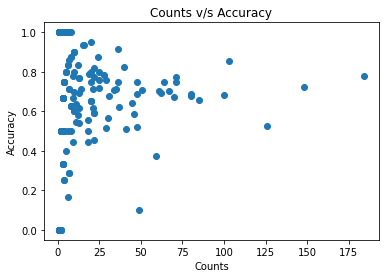

In [13]:
plt.scatter(rater_goodness["Number of Ratings"],
            rater_goodness["Average Correctness of Ratings"])
plt.xlabel("Counts")
plt.ylabel("Accuracy")
plt.title("Counts v/s Accuracy")

## Inference:

- Higher Number of reliability usually implies reliability. So, maybe, spammers don't spend much time rating urls
- Users with less number of ratings have a huge spread on their credibility. Thus, nothing can be inferred clearly.
- Spammers, though only a minority, usually rate less than 50 movies.

# [Q7 13 points] Overall predicted odds

## Problem Statement

Consider each url *u* that is **not** in the gold set, and each category *c*.  

For the pair *(u, c)*, calculate the product of odds of all turks who 

- **(a)** Rated url *u* as category *c*
- **(b)** Have rated more gold set urls than $75%$ of all turks who rated *at least one* gold-set url.

For example, if you find that there are 269 turks who rated at least one gold-set url, you want to select only the turks who have rated more gold-seturls than $75%$ of these 269 turks.  We can think of these as our *“reliable”* turks.

Now, our belief that url *u* belongs to category *c* depends on how many *“reliable”* turks rated *u* as *c*; specifically, our belief is based on the product of their reliability scores (i.e., their odds). We shall call such products of odds the ```overall odds``` henceforth.

## Solution

- Created a DataFrame ```active_turks``` that contains the top 75%ile of raters _(calculated from **rater_goodness** DataFrame)_.
- merged ```active_turks``` with ```labels_unknown``` on *turk* to get the ```turk_group``` DataFrame
- To calculate **Overall Odds**, we group ```turk_group``` on *Url* and *Category* and aggregate over the *Odds* column to find its product. We call this the *Overall Odds* and store the result in the ```product_odds``` DataFrame.

## Code


In [14]:
active_turks = rater_goodness[rater_goodness["Number of Ratings"] > rater_goodness["Number of Ratings"].quantile(0.75)]
active_turks

,Number of Ratings,Average Correctness of Ratings,Odds
turk,,,
A1253FXHCZ9CWM,29,0.517241,1.069214
A12RE8G66WTO8B,20,0.750000,2.988048
A153PKAL7OAY36,148,0.722973,2.600369
A18HIFA78GUAG9,13,0.538462,1.164144
A1DCIXV1JC91MY,22,0.590909,1.440922
...,...,...,...
AV30XWLULCP43,13,0.615385,1.595851
AVWJPWUEE3U4Q,36,0.750000,2.988048
AZ1S5BIG5R6P6,35,0.714286,2.491281


In [15]:
turk_group = pd.merge(active_turks, labels_unknown, left_index=True, right_on='turk')
turk_group

,Number of Ratings,Average Correctness of Ratings,Odds,turk,url,category
63,29,0.517241,1.069214,A1253FXHCZ9CWM,http://007absolutehardcore.com/early_cumshots/...,P
300,29,0.517241,1.069214,A1253FXHCZ9CWM,http://10000birds.com,G
435,29,0.517241,1.069214,A1253FXHCZ9CWM,http://101fetishes.com/femdomtorture/portal.htm,X
445,29,0.517241,1.069214,A1253FXHCZ9CWM,http://101greatgoals.com,G
660,29,0.517241,1.069214,A1253FXHCZ9CWM,http://123movers.com,G
...,...,...,...,...,...,...
90172,15,0.933333,13.793103,amurray,http://www.blazzpage.7p.com/,G
90173,15,0.933333,13.793103,amurray,http://www.byroncrawford.com/,P
90188,15,0.933333,13.793103,amurray,http://www.freelayouticons.com/,P
90189,15,0.933333,13.793103,amurray,http://www.hollywoodtuna.com/?p=4729,R


In [16]:
product_odds = turk_group.groupby(["url","category"])["Odds"].agg(["prod"])
product_odds.reset_index(inplace = True)
product_odds.columns = ["url","category","Overall Odds"]
product_odds

,url,category,Overall Odds
0,http://0-101.net,G,2.297602
1,http://000.cc,G,1.485456
2,http://0000.jp,G,14.339248
3,http://000relationships.com,G,3.841962
4,http://000relationships.com,P,1.851852
...,...,...,...
13978,http://zynga.com,G,3.666513
13979,http://zz868.com,G,1.047852
13980,http://zz868.com,P,1.851852
13981,http://zzx.cc,G,1.417620


# [Q8 13 points] Predicted categories

## Problem Statement

Create a DataFrame called *result_75*, with the following specs:

- **Index:** URLs not in the ```gold``` set
- **Columns:**
    - _*top category:*_ The *top category* should be the category with the highest *overall odds* for that url.
    - _*top odds:*_ The *top odds* should be the *overall odds* for that top category.
    
These are our predictions, and the confidence we have in them (higher *overall odds* implies greater confidence). If you want, you can check to see if the predicted categories make sense.

## Solution

- Group ```product_odds``` DataFrame by *URL* and calculate the max *Overall Odds* in each group
- Merge the aforementioned DataFrame with ```product_odds``` over *url* and *max*/*Overall Odds* again to obtain the corresponding *Category* for each
- This is the ```result_75``` DataFrame

## Code


In [17]:
result_75 = product_odds.groupby("url")["Overall Odds"].agg(["max"]).reset_index()
result_75 = pd.merge(result_75,product_odds, left_on = ["url","max"], right_on = ["url", "Overall Odds"])
result_75 = result_75.set_index("url")
result_75.drop(["max"], inplace = True, axis = 1)
result_75.columns = ["top category","top odds"]
result_75

,top category,top odds
url,,
http://0-101.net,G,2.297602
http://000.cc,G,1.485456
http://0000.jp,G,14.339248
http://000relationships.com,G,3.841962
http://000vitamins.com,G,4.033641
...,...,...
http://zwinky.com,G,17.201875
http://zylom.com,G,1.849543
http://zynga.com,G,3.666513


# [Q9 14 points] Predicted categories using more turks

## Problem Statement

Questions 7 and 8 above only considered the ratings of turks who had ratedenough  gold  set  URLs,  so  we  were  relatively  more  confident  about  their accuracies.

What happens if we loosen this restriction?

Repeat the code of Q7 and Q8, but replacing 75% by 25% in the description of Q7 (i.e., we also consider turks who have far fewer gold set ratings).

Call this ```result_25```.

Now let’s see how these two results compare.

Create a DataFrame where both  the  index  and  the  columns  are  the  various  categories,  and  the  cells contain  the  number  of  urls  with  these  as  the  top  categories  according to ```result75``` and ```result25```.

For example, the cell corresponding to the row category = **R** and the col category = **G** would be the number of URLs that were predicted to be **R** by ```result_75``` but predicted to be **G** by ```result25```.

Where are the most errors?

## Solution

- First we repeat **Q7** and **Q8** code snippets for $25%ile$ data. and store the result in ```result_25``` DataFrame.
- Merge ```result_25``` and ```result_75``` on **URL** and take only their respective *top categories*. Save this DataFrame as ```results```
- Create a ``crosstab``` between these two columns of ```results``` DataFrame

## Code


In [18]:
turks_25 = rater_goodness[rater_goodness["Number of Ratings"] > rater_goodness["Number of Ratings"].quantile(0.25)]

turk25_group = pd.merge(turks_25, labels_unknown, left_index=True, right_on='turk')

product_odds = turk25_group.groupby(["url","category"])["Odds"].agg(["prod"])
product_odds.reset_index(inplace = True)
product_odds.columns = ["url","category","Overall Odds"]

result_25 = product_odds.groupby("url")["Overall Odds"].agg(["max"]).reset_index()
result_25 = pd.merge(result_25,product_odds, left_on = ["url","max"], right_on = ["url", "Overall Odds"])
result_25 = result_25.set_index("url")
result_25.drop(["max"], inplace = True, axis = 1)
result_25.columns = ["top category","top odds"]
result_25

,top category,top odds
url,,
http://0-101.net,G,2.297602e+00
http://000.cc,G,2.218192e+03
http://0000.jp,G,2.847963e+07
http://000relationships.com,P,1.851852e+00
http://000vitamins.com,G,5.343559e+00
...,...,...
http://zwinky.com,P,1.000000e+03
http://zylom.com,G,3.062113e+03
http://zynga.com,G,5.386158e+01


In [19]:
results = pd.merge(left=result_75.reset_index(),
                    right=result_25.reset_index(),
                    on="url",
                    suffixes=("_75","_25"))[["top category_75","top category_25"]]
results

,top category_75,top category_25
0,G,G
1,G,G
2,G,G
3,G,P
4,G,G
...,...,...
10617,G,P
10618,G,G
10619,G,G
10620,P,G


In [20]:
pd.crosstab(index = results["top category_75"], rownames = ["75%ile"],
            columns = results["top category_25"], colnames = ["25%ile"])

25%ile,G,P,R,X
75%ile,,,,
G,8280,587,182,215
P,199,354,52,25
R,22,34,127,28
X,28,5,28,456


In [21]:
# Normalised Crosstab
pd.crosstab(index = results["top category_75"], rownames = ["75%ile"],
            columns = results["top category_25"], colnames = ["25%ile"], normalize = 0)

25%ile,G,P,R,X
75%ile,,,,
G,0.893782,0.063364,0.019646,0.023208
P,0.315873,0.561905,0.082540,0.039683
R,0.104265,0.161137,0.601896,0.132701
X,0.054159,0.009671,0.054159,0.882012


# Inference:

- The Maximum values in each row are along the Prinipal Diagonal. This implies that most of the Predictions between ```result_25``` and ```result_75``` match, i.e: A higher proportion of predictions are correct.
- There is a big dilemma, or, the difference between which movies are **Guidance** _(G)_ and which are **Parental Guidance** _(P)_ is blurred. This can be seen from the fact that the highest errors are between *G/P* prediction pair.
- Most Spammers probably randomly rate the surveys. Which explains why movies which can be reiably predicted to be *G* movies _(as rated by the top 75%ile-ers)_ are mis-predicted by the 25%ile-ers

***